In [58]:
# Agglomerative Clustering

def agglo_clust(X,n):
  import numpy as np
  def Euclidian_Dist(x,y):
    return np.linalg.norm(x-y)

  def Dist_mat(X):
    dist_mat=np.zeros((len(X),len(X)))
    for i in range(len(X)):
      for j in range(len(X)):
        dist_mat[i,j]=round(Euclidian_Dist(X[i],X[j]),2) if i!=j else np.inf
    return dist_mat

  def combine(X,D):
    a,b = np.unravel_index(np.argmin(D, axis=None), D.shape)
    a,b=(b,a) if b<a else (a,b)
    # print("Vector of X to be combined : " + str(a+1) + "," + str(b+1))
    X[a]=(X[a]+X[b])/2
    newX=np.delete(X,b,0)
    D[a,:]=(D[a,:]+D[b,:])/2
    D[:,a]=(D[:,a]+D[:,b])/2
    D=np.delete(D,b,0)
    D=np.delete(D,b,1)
    return newX,a,b,D

  newX=X
  label=[[i] for i in range(len(X))]
  D=Dist_mat(newX)
  while newX.shape[0]>n:
    # print(D)
    newX,a,b,D=combine(newX,D)
    label[a]+=label[b]
    label.pop(b)
    # print()
    # print(newX.T)
  
  l=[-1 for _ in range(len(X))]
  for i in range(len(label)):
    for j in label[i]:
      l[j]=i
  return l

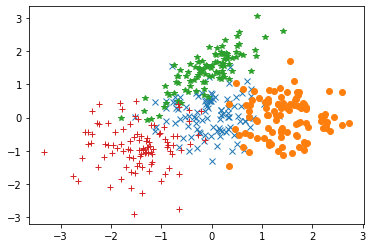

In [59]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
# write your code here
mean=np.array([0,0])
cov=0.3*np.array([[1,0],[0,1]])
x4=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x4[:,0],x4[:,1],"x")

mean=np.array([1.5,0])
cov=0.3*np.array([[1,0],[0,1]])
x2=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x2[:,0],x2[:,1],"o")

mean=np.array([0,1.5])
cov=np.array([[0.3,0.25],[0.25,0.3]])
x3=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x3[:,0],x3[:,1],"*")

mean=np.array([-1.5,-1])
cov=0.4*np.array([[1,0],[0,1]])
x1=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x1[:,0],x1[:,1],"+")

plt.show()

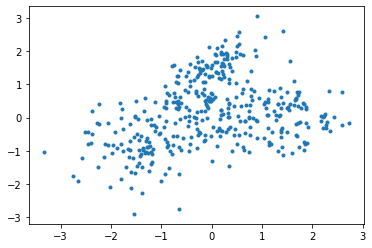

In [60]:
x=np.concatenate((x1,x2,x3,x4), axis=0)
plt.plot(x[:,0],x[:,1],".")

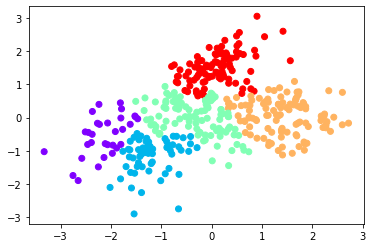

In [63]:
label=agglo_clust(x,5)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=label, cmap='rainbow')